In [ ]:
#Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import  seaborn as sns

In [4]:
#ISLP imports
from ISLP import load_data
from ISLP.models import (ModelSpec as ms, summarize, poly)

In [ ]:
#Importing Data
Boston = load_data("Boston")
Boston.head()

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [14]:
#OLS
X = pd.DataFrame({"intercepts":np.ones(Boston.shape[0]), "lstat": Boston["lstat"]})

y = Boston['medv']

model = sm.OLS(y,X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercepts,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


In [18]:
#Predictions
new_df = pd.DataFrame({"Intercepts":np.ones(3),"Lstat":[5,10,15]})

new_predictions = results.get_prediction(new_df)
new_predictions.predicted_mean

array([29.80359411, 25.05334734, 20.30310057])

In [19]:
#Confidence Interval
new_predictions.conf_int(alpha = 0.05)

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

<Axes: xlabel='lstat', ylabel='medv'>

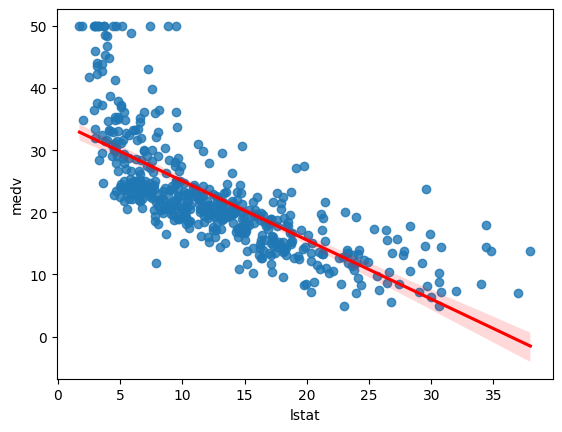

In [24]:
sns.regplot(x = "lstat",y = "medv", data = Boston, line_kws={"color":"Red"})